# Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data file in df

##### Let's read the csv data file and disply its head

In [2]:
df = pd.read_csv('mammographic_masses_data_clean.csv')
df.head()

,BI-RADS,Age,Shape,Margin,Density,Target
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


##### Let's see how many data entries we got

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
BI-RADS    830 non-null int64
Age        830 non-null int64
Shape      830 non-null int64
Margin     830 non-null int64
Density    830 non-null int64
Target     830 non-null int64
dtypes: int64(6)
memory usage: 39.0 KB


##### Let's see what type cancer is common

In [4]:
df['Target'].value_counts()

0    427
1    403
Name: Target, dtype: int64

##### Let's decribe the data

In [5]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Target
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


##### Let's plot the common cancer type

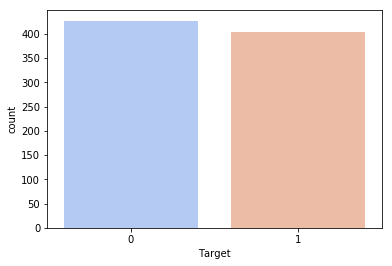

In [7]:
sns.countplot(x='Target', palette ='coolwarm', data = df )
plt.show()

##### Let's visualize the biopsies (with benign and malignant outcome) based on age

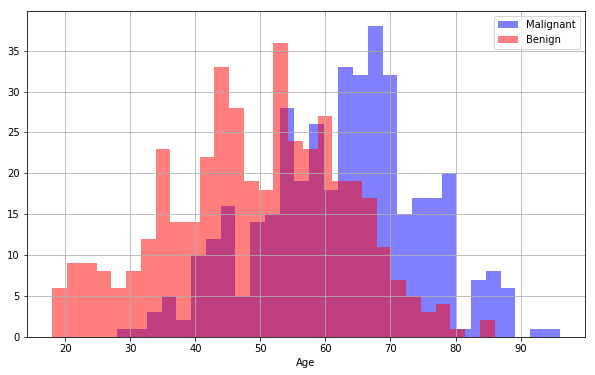

In [11]:
plt.figure(figsize=(10,6))
df[df['Target']==1]['Age'].hist(alpha=0.5,color='blue',bins=30,label='Malignant')
df[df['Target']==0]['Age'].hist(alpha=0.5,color='red',bins=30,label='Benign')
plt.legend()
plt.xlabel('Age')
plt.show()

##### Let's do the "train test split" using test size = 0.3 and random states default value

In [12]:
from sklearn.model_selection import  train_test_split

In [13]:
X = df.drop('Target', axis=1)
y = df['Target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.30, random_state=101)

### Decision Tree

##### Let's import decision tree classifier and create its instance

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

##### Let's fit the training data to the model

In [29]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Let's do the predictions for our test data 

In [30]:
predictions = dtree.predict(X_test)

###### Let's import ther Classification report and Confusion matrix then print them

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[106  27]
 [ 42  74]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.75       133
           1       0.73      0.64      0.68       116

   micro avg       0.72      0.72      0.72       249
   macro avg       0.72      0.72      0.72       249
weighted avg       0.72      0.72      0.72       249



### Random Forests

##### Let's import Random Forest Classifier and create its instance with 200 no of trees

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

##### Let's fit our training data to Random Forests instance

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

##### Let's do the predictions

In [35]:
rfc_predictions = rfc.predict(X_test)

##### Let's print the results

In [36]:
print(confusion_matrix(y_test, rfc_predictions))
print(classification_report(y_test, rfc_predictions))

[[110  23]
 [ 30  86]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       133
           1       0.79      0.74      0.76       116

   micro avg       0.79      0.79      0.79       249
   macro avg       0.79      0.78      0.79       249
weighted avg       0.79      0.79      0.79       249



###### The Random Forests Classifier are the best model.